In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [ ]:
sequence=np.array([i for i in range(1,101)])

In [ ]:
window_size=3
x=[]
y=[]

In [ ]:
for i in range(len(sequence) - window_size):
  x.append(sequence[i:i+window_size])
  y.append(sequence[i+window_size])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x.reshape(x.shape[0],x.shape[1],1)

In [ ]:
model=Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss="mse")


In [ ]:
model.fit(x, y, epochs=800, verbose=0)
print("tranning complete")

tranning complete


In [ ]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input, verbose=0)
print( f"predicted next num: {predicted[0][0]:.2f}")

predicted next num: 11.02


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


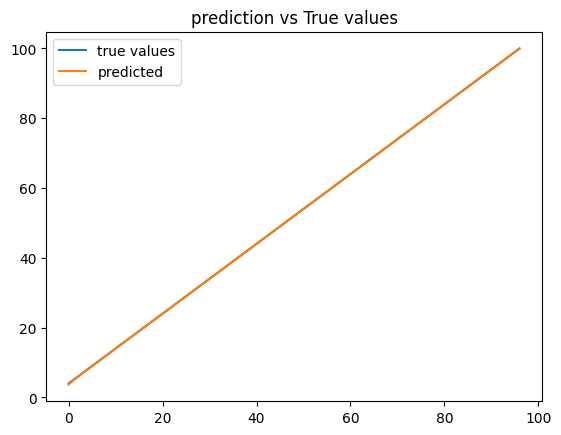

In [ ]:
prediction=model.predict(x)
plt.plot(y, label="true values")
plt.plot(prediction, label="predicted")
plt.legend()
plt.title("prediction vs True values")
plt.show()

In [ ]:
# Convert model architecture to JSON
model_json = model.to_json()
# Get model weights as a list of numpy arrays
model_weights = model.get_weights()

import pickle

# Save both architecture and weights to a .pkl file
with open("model.pkl", "wb") as f:
    pickle.dump((model_json, model_weights), f)

print("✅ Keras model saved as model.pkl")

✅ Keras model saved as model.pkl


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model (2).pkl to model (2).pkl


In [ ]:
import pickle
from tensorflow.keras.models import model_from_json
import numpy as np

# Load the .pkl file
with open('model.pkl', 'rb') as f:
    model_json, model_weights = pickle.load(f)

# Reconstruct the model
model = model_from_json(model_json)
model.set_weights(model_weights)
model.compile(optimizer='adam', loss='mse')

# ✅ Test the model
window_size = 3
test_input = np.array([45,46,47])
test_input = test_input.reshape((1, window_size, 1))

predicted = model.predict(test_input, verbose=0)
print(f"Predicted next number: {predicted[0][0]:.2f}")

Predicted next number: 48.00
